## Missing data 

In this video we'll look at some common techniques for 
1. Inspecting Missing data
2. Replacing missing data

In [101]:
import pandas as pd
import wget
import csv

Ref: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [ ]:
wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original")
#wget.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names")

### Convert the data file to csv.. as it seems to have mixture of tabs and spaces as separator

In [102]:
lines = []
with open('auto-mpg.data-original') as fh:
    for line in fh:
        separated = line.split("\t")
        abc = separated[0].split()
        separated[1].strip().strip("\"")
        abc.append(separated[1].strip().strip("\""))
        lines.append(abc)
print(len(lines))

406


In [103]:
column_names = ['mpg', 'cylinders', 'displacement','horsepower', 'weight','acceleration', 'model year', 'origin', 'car name']
with open('auto-mpg.csv', 'w') as fh:
    _w = csv.writer(fh)
    _w.writerow(column_names)
    _w.writerows(lines)

## load csv

In [104]:
df = pd.read_csv('auto-mpg.csv')

In [105]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


## Check for missing values n/a 

1. isna() will find 'None' or NaN
2. isnull() is identical to isna()
3. For quantiative, sometimes a missing value is not indicated by a nan, but another number, that is mentioned in description eg. -99999, -1
4. For categorical, sometimes will use 'missing', 'unknown' type labels.

In [107]:
df.isna().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [108]:
df[df.mpg.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
10,NaN,4.0,133.0,115.0,3090.0,17.5,70.0,2.0,citroen ds-21 pallas
11,NaN,8.0,350.0,165.0,4142.0,11.5,70.0,1.0,chevrolet chevelle concours (sw)
12,NaN,8.0,351.0,153.0,4034.0,11.0,70.0,1.0,ford torino (sw)
13,NaN,8.0,383.0,175.0,4166.0,10.5,70.0,1.0,plymouth satellite (sw)
14,NaN,8.0,360.0,175.0,3850.0,11.0,70.0,1.0,amc rebel sst (sw)
17,NaN,8.0,302.0,140.0,3353.0,8.0,70.0,1.0,ford mustang boss 302
39,NaN,4.0,97.0,48.0,1978.0,20.0,71.0,2.0,volkswagen super beetle 117
367,NaN,4.0,121.0,110.0,2800.0,15.4,81.0,2.0,saab 900s


In [109]:
df[df.horsepower.isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
38,25.0,4.0,98.0,NaN,2046.0,19.0,71.0,1.0,ford pinto
133,21.0,6.0,200.0,NaN,2875.0,17.0,74.0,1.0,ford maverick
337,40.9,4.0,85.0,NaN,1835.0,17.3,80.0,2.0,renault lecar deluxe
343,23.6,4.0,140.0,NaN,2905.0,14.3,80.0,1.0,ford mustang cobra
361,34.5,4.0,100.0,NaN,2320.0,15.8,81.0,2.0,renault 18i
382,23.0,4.0,151.0,NaN,3035.0,20.5,82.0,1.0,amc concord dl


In [110]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [111]:
df.drop(df[df.mpg.isna()].index, inplace=True)
df.reset_index(inplace=True)

In [112]:
df.shape

(398, 10)

In [113]:
df['car name'].nunique()

305

## Train / Test split

In [114]:
from sklearn.model_selection import train_test_split
training_columns = [col for col in df.columns if (col != 'mpg') & (col != 'car name')]
X = df[training_columns]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)
X_train = X_train.copy()
X_test = X_test.copy()

In [115]:
X_train[X_train.horsepower.isna()]

,index,cylinders,displacement,horsepower,weight,acceleration,model year,origin
354,361,4.0,100.0,NaN,2320.0,15.8,81.0,2.0
126,133,6.0,200.0,NaN,2875.0,17.0,74.0,1.0
32,38,4.0,98.0,NaN,2046.0,19.0,71.0,1.0
330,337,4.0,85.0,NaN,1835.0,17.3,80.0,2.0


In [116]:
missing = X_train[X_train.horsepower.isna()].index

## Imputing Missing Values

### Simple Impute

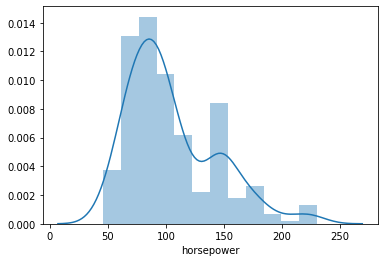

In [117]:
import seaborn as sns
_ = sns.distplot(X_train['horsepower'].dropna())


In [118]:
X_train['horsepower'].median()

94.5

In [119]:
X_train['horsepower'].mean()

104.55442176870748

In [120]:
import numpy as np
from sklearn.impute import SimpleImputer

imp = SimpleImputer(np.nan, strategy='median')
horsepower_imputed = imp.fit_transform(X_train[['horsepower']])

In [121]:
X_train[['horsepower']].head()

,horsepower
23,113.0
24,90.0
347,65.0
380,88.0
69,160.0


In [122]:
X_train.loc[X_train.index, 'horsepower'] = horsepower_imputed

In [123]:
X_train.loc[missing, 'horsepower']

354    94.5
126    94.5
32     94.5
330    94.5
Name: horsepower, dtype: float64

In [124]:
X_test[X_test.horsepower.isna()]

,index,cylinders,displacement,horsepower,weight,acceleration,model year,origin
336,343,4.0,140.0,NaN,2905.0,14.3,80.0,1.0
374,382,4.0,151.0,NaN,3035.0,20.5,82.0,1.0


In [125]:
horsepower_imputed = imp.transform(X_test[['horsepower']])

In [126]:
X_test.loc[X_test.index, 'horsepower'] = horsepower_imputed

In [127]:
X_test.loc[336]

index            343.0
cylinders          4.0
displacement     140.0
horsepower        94.5
weight          2905.0
acceleration      14.3
model year        80.0
origin             1.0
Name: 336, dtype: float64

### KNN Imputer

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66)
X_train = X_train.copy()
X_test = X_test.copy()

In [129]:
from sklearn.impute import KNNImputer

imp = KNNImputer(np.nan, n_neighbors=2)
all_imputed = imp.fit_transform(X_train)

In [130]:
all_imputed.shape

(298, 8)

In [131]:
X_train.loc[missing, 'horsepower']

354   NaN
126   NaN
32    NaN
330   NaN
Name: horsepower, dtype: float64

In [132]:
X_train.loc[X_train.index] = all_imputed

In [133]:
X_train.loc[missing, 'horsepower']

354     61.5
126    100.0
32      79.0
330     64.5
Name: horsepower, dtype: float64

### IterativeImputer
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer


### categorical

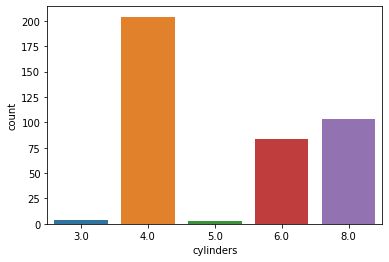

In [134]:
_ = sns.countplot(df.cylinders)

Use the simple imputer with a constant value of 4.0, or knnimputer

## Save the output to a new file

In [ ]:
X_train.to_csv("cleaned.csv", index=False)

In [ ]:
X_test.to_csv("test_cleaned.csv", index=False)